In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn

In [2]:
df = pd.read_pickle('/Users/gocchini/Desktop/CC project/tutorial_following/results_19_05.pkl')

In [3]:
df

,url_host_name,website_postcodes
0,0161studio.co.uk,{}
1,017.co.uk,{}
2,01786.co.uk,{}
3,01845.co.uk,{}
4,01943.co.uk,{}
5,01am.co.uk,{}
6,01capital.co.uk,{}
7,01handyman.co.uk,{}
8,01zero-one.co.uk,"{'WC1X 8RA': 1, 'W1F 0HS': 2}"
9,02-creative.co.uk,{}


In [4]:
df2 = pd.read_pickle('/Users/gocchini/Desktop/CC project/tutorial_following/results_18_05.pkl')
df3 = pd.read_pickle('/Users/gocchini/Desktop/CC project/tutorial_following/results_20_05.pkl')

In [7]:
pcodes2= df2['website_postcodes'].tolist()
pcodes3 = df3['website_postcodes'].tolist()
pcodes = df['website_postcodes'].tolist()

In [8]:
pcodes0 = pcodes2 + pcodes+pcodes3

In [9]:
pcodes_list = []
for i in pcodes0:
    for keys, values in i.items(): #values is needeeeeed
        pcodes_list.append(keys)

In [10]:
len(pcodes_list)

8268

In [11]:
all_postcodes_centroids= pd.read_csv('/Users/gocchini/Downloads/NSPL_NOV_2022_UK/Data/NSPL_NOV_2022_UK.csv')

/var/folders/0f/pzhfvnbj63jg3sk3nj099q3w0000gq/T/ipykernel_45809/2875589806.py:1: DtypeWarning: Columns (31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  all_postcodes_centroids= pd.read_csv('/Users/gocchini/Downloads/NSPL_NOV_2022_UK/Data/NSPL_NOV_2022_UK.csv')


In [12]:
centrs_df = all_postcodes_centroids[['pcd', 'lat', 'long']]

In [13]:
centrs_df

,pcd,lat,long
0,AB1 0AA,57.101474,-2.242851
1,AB1 0AB,57.102554,-2.246308
2,AB1 0AD,57.100556,-2.248342
3,AB1 0AE,57.084444,-2.255708
4,AB1 0AF,57.096656,-2.258102
...,...,...,...
2683730,ZE3 9JW,59.873651,-1.305697
2683731,ZE3 9JX,59.875286,-1.307502
2683732,ZE3 9JY,59.891572,-1.313847
2683733,ZE3 9JZ,59.892392,-1.310899


In [14]:
centrs_df['p'] = centrs_df['pcd']

/var/folders/0f/pzhfvnbj63jg3sk3nj099q3w0000gq/T/ipykernel_45809/2353815916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centrs_df['p'] = centrs_df['pcd']


In [15]:
pcodes_df = pd.DataFrame(pcodes_list)

In [16]:
pcodes_df.columns = ['p']

In [17]:
p = pcodes_df.merge(centrs_df, right_on = 'pcd', left_on= 'p', how='right')

In [18]:
p

,p_x,pcd,lat,long,p_y
0,NaN,AB1 0AA,57.101474,-2.242851,AB1 0AA
1,NaN,AB1 0AB,57.102554,-2.246308,AB1 0AB
2,NaN,AB1 0AD,57.100556,-2.248342,AB1 0AD
3,NaN,AB1 0AE,57.084444,-2.255708,AB1 0AE
4,NaN,AB1 0AF,57.096656,-2.258102,AB1 0AF
...,...,...,...,...,...
2683746,NaN,ZE3 9JW,59.873651,-1.305697,ZE3 9JW
2683747,NaN,ZE3 9JX,59.875286,-1.307502,ZE3 9JX
2683748,NaN,ZE3 9JY,59.891572,-1.313847,ZE3 9JY
2683749,NaN,ZE3 9JZ,59.892392,-1.310899,ZE3 9JZ


In [19]:
pc = p[p['p_x'].notna()]

In [31]:
pc

,p_x,pcd,lat,long,p_y
39182,AL1 1LJ,AL1 1LJ,51.749541,-0.334431,AL1 1LJ
39200,AL1 1NG,AL1 1NG,51.750305,-0.337975,AL1 1NG
39345,AL1 1XB,AL1 1XB,51.735008,-0.317668,AL1 1XB
39513,AL1 2LP,AL1 2LP,51.734561,-0.339972,AL1 2LP
40461,AL1 5HH,AL1 5HH,51.750264,-0.310538,AL1 5HH
...,...,...,...,...,...
2646853,WV8 2BN,WV8 2BN,52.622949,-2.193855,WV8 2BN
2646940,WV8 2LB,WV8 2LB,52.620614,-2.180624,WV8 2LB
2647093,WV9 5ND,WV9 5ND,52.625156,-2.146370,WV9 5ND
2649940,YO1 6EX,YO1 6EX,53.955783,-1.088840,YO1 6EX


In [42]:
pcc = pc[~(pc['lat'] > 60)]

In [43]:
pcc

,p_x,pcd,lat,long,p_y
39182,AL1 1LJ,AL1 1LJ,51.749541,-0.334431,AL1 1LJ
39200,AL1 1NG,AL1 1NG,51.750305,-0.337975,AL1 1NG
39345,AL1 1XB,AL1 1XB,51.735008,-0.317668,AL1 1XB
39513,AL1 2LP,AL1 2LP,51.734561,-0.339972,AL1 2LP
40461,AL1 5HH,AL1 5HH,51.750264,-0.310538,AL1 5HH
...,...,...,...,...,...
2646853,WV8 2BN,WV8 2BN,52.622949,-2.193855,WV8 2BN
2646940,WV8 2LB,WV8 2LB,52.620614,-2.180624,WV8 2LB
2647093,WV9 5ND,WV9 5ND,52.625156,-2.146370,WV9 5ND
2649940,YO1 6EX,YO1 6EX,53.955783,-1.088840,YO1 6EX


In [44]:
pc = pcc

In [45]:
coords = pc[['lat', 'long']]

In [46]:
pts = coords.apply(lambda r: Point(r.long, r.lat), axis=1)

In [47]:

gdb = gpd.GeoDataFrame(coords.assign(geometry=pts), \
                       crs={'init' :'epsg:4326'})

/Users/gocchini/opt/anaconda3/envs/common_crawl/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

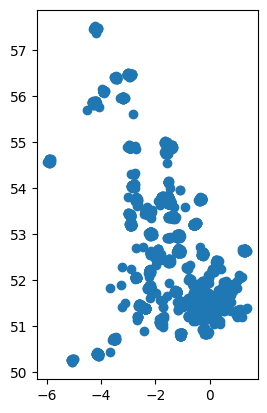

In [48]:
gdb.plot()

In [49]:
xys = gdb['geometry'].apply(lambda pt: pd.Series({'x': pt.x, 'y': pt.y}))
gdb['x'] = xys['x']
gdb['y'] = xys['y']

# Question: what if a compamnu has loads of postcodes? All happening the same amount of times 

In [50]:
ukk = gpd.read_file('/Users/gocchini/Downloads/GBR_adm/GBR_adm2.shp')

In [51]:
ukk = ukk.dissolve(by = 'TYPE_2')

In [52]:
ukk.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

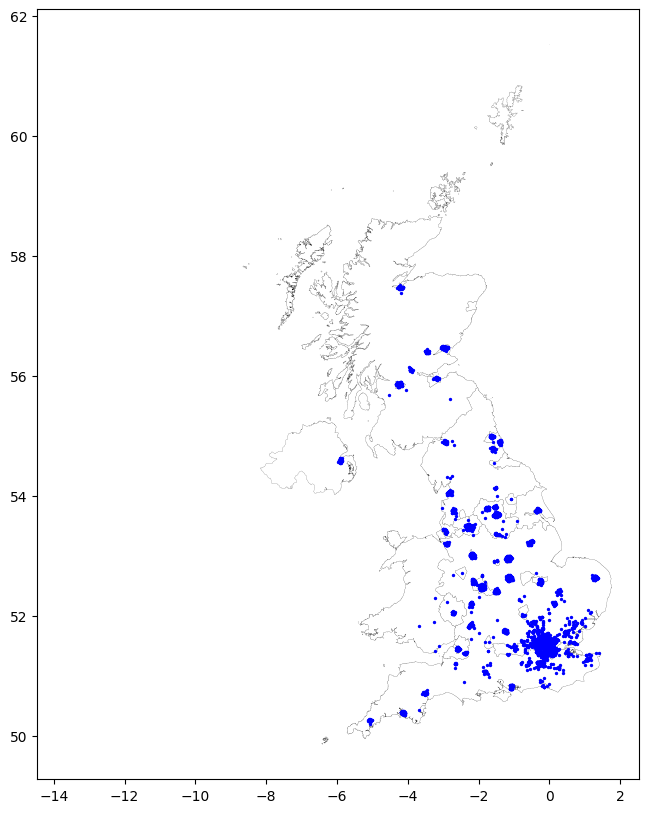

In [56]:

# Set up figure and axes
f, ax = plt.subplots(1, figsize=(10, 10))
# Add a base layer with the LSOA geography
ukk.plot(ax = ax, color='white', edgecolor='black', linewidth=0.1)
#generate KDE
gdb.plot(ax=ax, color = 'blue', markersize = 2)
plt.show()

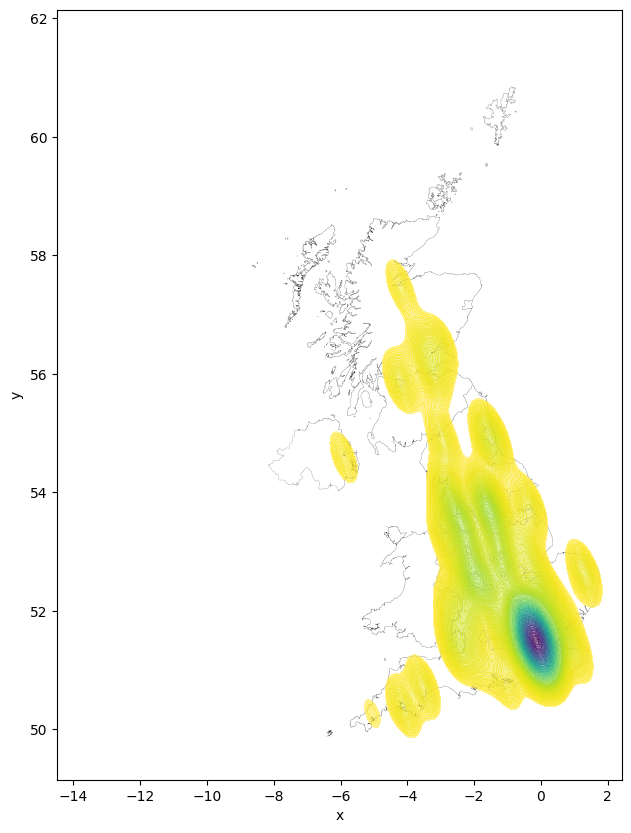

In [54]:

# Set up figure and axes
f, ax = plt.subplots(1, figsize=(10, 10))
# Add a base layer with the LSOA geography
ukk.plot(ax = ax, color='white', edgecolor='black', linewidth=0.1)
#generate KDE
seaborn.kdeplot(gdb, x = 'x', y = 'y', ax=ax, 
    n_levels=100,
    fill=True,
    alpha=0.55,
    cmap="viridis_r",
)
plt.show()